In [1]:
import sys
import torch
from dcgan_cartoon import Generator
sys.path.append("/data/bitt/wzq/wzq/GANs/")
from utils import make_image

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
model = Generator().to(device)
model.load_state_dict(torch.load("./checkpoints_cartoon/generator_best.pt"))

In [4]:
print(model)

Generator(
  (fc1): Linear(in_features=100, out_features=16384, bias=True)
  (conv1): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): ConvTranspose2d(32, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
)


In [5]:
z = torch.randn(64, 100).to(device)

In [6]:
model.eval()
with torch.no_grad():
    output = model(z)
    output = (output + 1.0) / 2.0

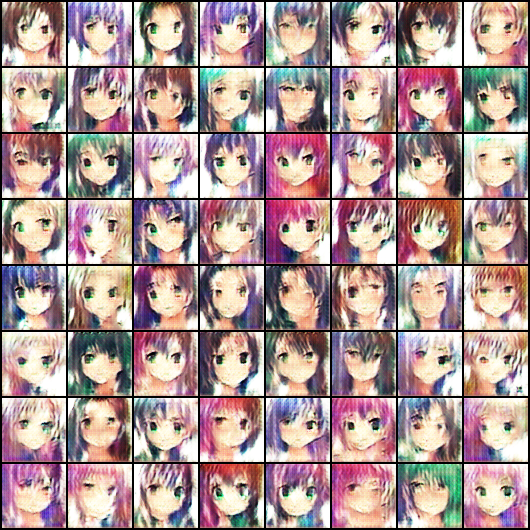

In [7]:
make_image(output)